<a href="https://colab.research.google.com/github/jessica550/gender-classification_cnn/blob/main/Classifica%C3%A7%C3%A3o_de_G%C3%AAnero_com_CNN_Dataset_CUHK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Total de imagens carregadas: 188
Total de rótulos carregados: 188


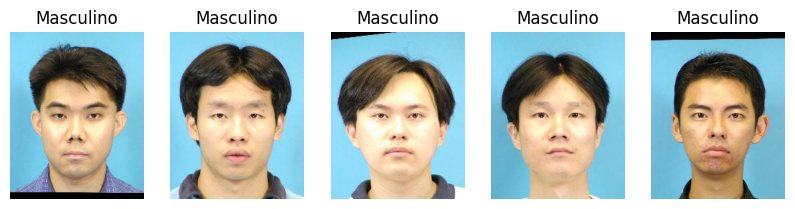

c:\Users\Windows 11\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 248, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 124, 99, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 124, 99, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 122, 97, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 61, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 61, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 187392)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    23,986,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,005,954 (91.58 MB)

 Trainable params: 24,005,954 (91.58 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5738 - loss: 10.7154 - val_accuracy: 0.2143 - val_loss: 6.1186
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 994ms/step - accuracy: 0.4187 - loss: 9.0902 - val_accuracy: 0.7857 - val_loss: 0.5899
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 981ms/step - accuracy: 0.6721 - loss: 2.2604 - val_accuracy: 0.7857 - val_loss: 0.5070
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 733ms/step - accuracy: 0.6920 - loss: 1.4133 - val_accuracy: 0.7857 - val_loss: 0.6839
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 749ms/step - accuracy: 0.6604 - loss: 0.6272 - val_accuracy: 0.5000 - val_loss: 0.6901
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 750ms/step - accuracy: 0.7406 - loss: 0.6421 - val_accuracy: 0.8214 - val_loss: 0.6800
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 744ms/step - accuracy: 0.6398 - loss: 0.6298 - val_accuracy: 0.7857 - val_loss: 0.6724
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 729ms/step - accuracy: 0.6671 - loss: 0.5722 - val_accuracy: 0.8036 - val_loss: 0

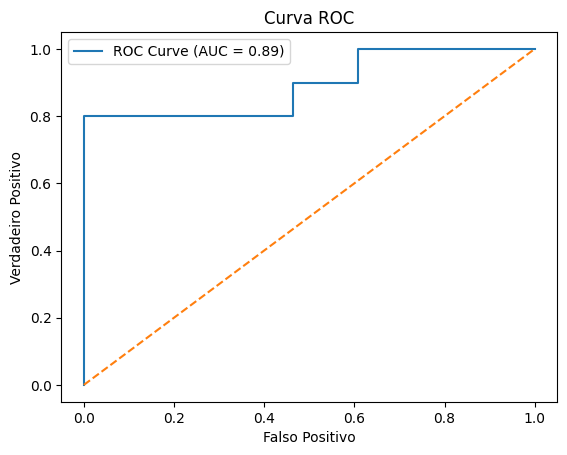

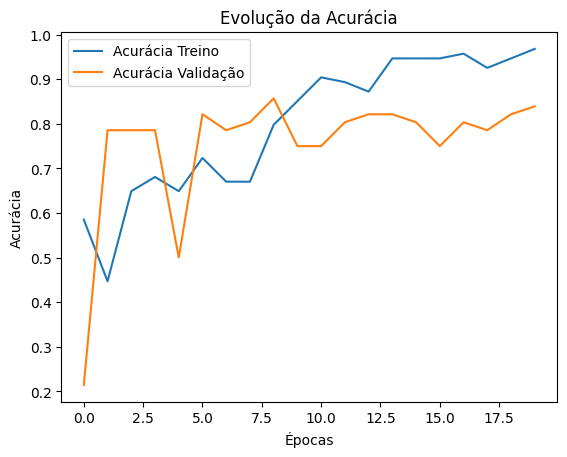

In [2]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Caminho para a pasta 'photos' no dataset
base_dir = '../data/photos'  # Altere para o caminho correto caso necessário

# Classes para o dataset (0 = Masculino, 1 = Feminino)
classes = {0: 'Masculino', 1: 'Feminino'}

# Função para carregar imagens e rótulos da pasta 'photos'
def carregar_imagens_e_rotulos(diretorio):
    imagens = []
    rotulos = []
    arquivos_nao_processados = []

    for arquivo in os.listdir(diretorio):
        if arquivo.endswith('.jpg'):  # Apenas arquivos de imagem
            caminho_imagem = os.path.join(diretorio, arquivo)
            try:
                img = load_img(caminho_imagem, target_size=(250, 200))
                img_array = img_to_array(img) / 255.0
                imagens.append(img_array)

                # Atribuir rótulos com base no nome do arquivo
                if arquivo.startswith('m'):
                    rotulos.append(0)  # Masculino
                elif arquivo.startswith('f'):
                    rotulos.append(1)  # Feminino
                else:
                    arquivos_nao_processados.append(arquivo)
            except Exception as e:
                arquivos_nao_processados.append(arquivo)
                print(f"Erro ao processar o arquivo {arquivo}: {e}")

    if arquivos_nao_processados:
        print(f"Atenção! Alguns arquivos não foram processados: {arquivos_nao_processados}")

    return np.array(imagens), np.array(rotulos)

# Carregar imagens e rótulos
X, y = carregar_imagens_e_rotulos(base_dir)
print(f"Total de imagens carregadas: {len(X)}")
print(f"Total de rótulos carregados: {len(y)}")

# Verificar consistência
if len(X) != len(y):
    raise ValueError(f"Inconsistência detectada: {len(X)} imagens e {len(y)} rótulos.")

# Dividir o dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=23)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=23)

# Exibir imagens
def exibir_imagens(imagens, rotulos, quantidade=5):
    plt.figure(figsize=(10, 5))
    for i in range(quantidade):
        plt.subplot(1, quantidade, i + 1)
        plt.imshow(imagens[i])
        plt.title(classes[rotulos[i]])
        plt.axis('off')
    plt.show()

exibir_imagens(X_train, y_train)

# Criar o modelo CNN
def criar_modelo():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(250, 200, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(2, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

modelo = criar_modelo()
modelo.summary()

# Treinar o modelo
history = modelo.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

# Avaliar o modelo
y_pred = np.argmax(modelo.predict(X_test), axis=1)
print(classification_report(y_test, y_pred, target_names=list(classes.values())))

# Curva ROC e AUC
y_probs = modelo.predict(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("Falso Positivo")
plt.ylabel("Verdadeiro Positivo")
plt.title("Curva ROC")
plt.legend()
plt.show()

# Evolução da acurácia
plt.figure()
plt.plot(history.history['accuracy'], label='Acurácia Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.title('Evolução da Acurácia')
plt.legend()
plt.show()
